In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, f1_score


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 

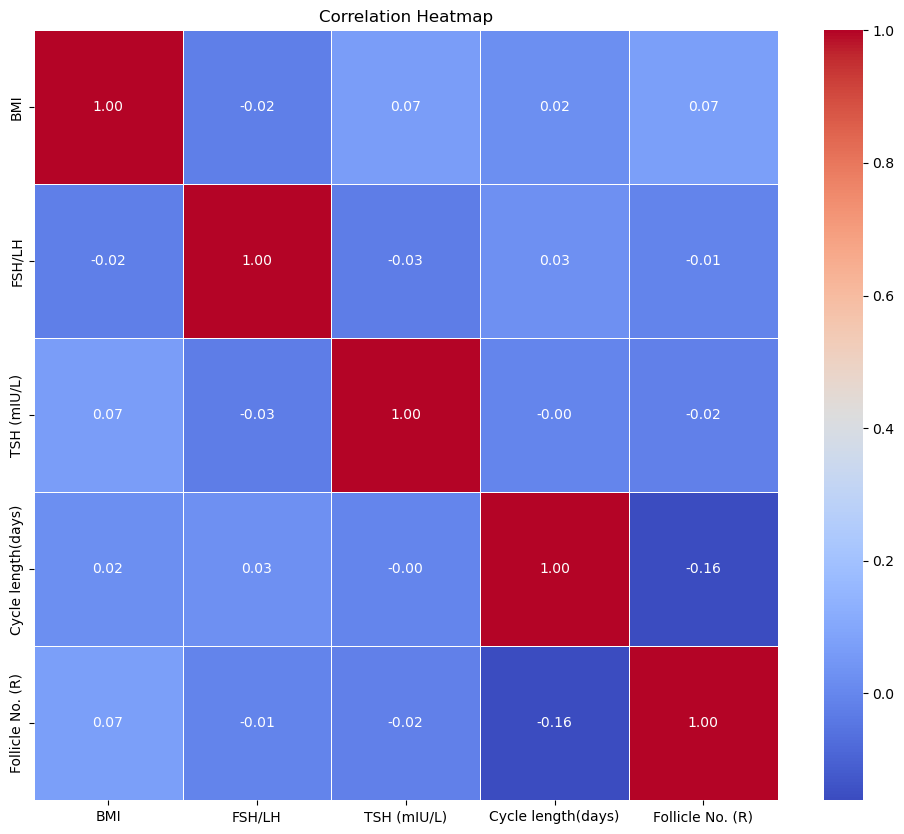


Missing Data After Dropping:
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darke

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv("PCOS_data_without_infertility.csv")  # Adjust with your file path

# Step 2: Check basic information about the dataset
print("Dataset Info:")
print(data.info())  # Get an overview of the data (e.g., column names, data types, non-null counts)

# Step 3: Get statistical summary for numerical columns
print("\nStatistical Summary:")
print(data.describe())  # Get summary statistics for numerical columns (e.g., mean, std, min, max)

# # Step 4: Drop rows with missing values
# data.dropna(inplace=True)  # Drop rows with missing values

# Step 5: Plot correlation heatmap to visualize relationships between numerical features
# Select relevant columns for correlation analysis
relevant_columns = ['BMI',  'FSH/LH', 'TSH (mIU/L)', 'Cycle length(days)', 'Follicle No. (R)']  # Example columns, adjust as needed
correlation_data = data[relevant_columns]

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Set the size of the heatmap
sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")  # Add a title to the heatmap
plt.show()

# Step 6: Check for missing data in each column (After dropping rows with missing values)
print("\nMissing Data After Dropping:")
missing_data = data.isnull().sum()  # Sum of missing values per column
print(missing_data)




In [23]:
# Step 1: Handle missing values (Filling with the median for now)
data['FSH/LH'].fillna(data['FSH/LH'].median(), inplace=True)
data['TSH (mIU/L)'].fillna(data['TSH (mIU/L)'].median(), inplace=True)

# Step 2: Create BMI categories based on thresholds (as per paper)
data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 40], 
                              labels=["Underweight", "Normal", "Overweight", "Obese"])

# Step 3: Symptom Grouping using rule-based criteria (as per paper)
# 1. Obesity
data['Obesity'] = (data['BMI'] >= 30)  # Obesity if BMI >= 30

# 2. Insulin Resistance
# Let's assume insulin resistance is indicated by BMI >= 28 (you can adjust this threshold)
data['Insulin_Resistance'] = (data['BMI'] >= 28)

# 3. Hormonal Imbalance (FSH/LH < 1.3 or TSH > 4.7 indicates imbalance)
data['Hormonal_Imbalance'] = (data['FSH/LH'] < 1.3) | (data['TSH (mIU/L)'] > 4.7)

# 4. Menstrual Issues
# Assuming cycle length outside 2-5 days is irregular (this is just an example, adjust as needed)
data['Menstrual_Issues'] = (data['Cycle length(days)'] > 5) | (data['Cycle length(days)'] <= 2)

# 5. Skin and Hair Problems
# Assumes that skin darkening or hair issues are indicators of skin/hair problems
data['Skin_Hair_Problems'] = (data['Skin darkening (Y/N)'] == 1) | \
                             (data['Hair loss(Y/N)'] == 1) | \
                             (data['Pimples(Y/N)'] == 1) | \
                             (data['hair growth(Y/N)'] == 1)

# 6. Ovulation Problems
# Assuming follicle count below 5 is indicative of ovulation problems
data['Ovulation_Problems'] = data['Follicle No. (R)'] < 5

# Step 4: Display the final dataframe with the new symptom groups
print(data[['BMI_category', 'Obesity', 'Insulin_Resistance', 'Hormonal_Imbalance', 
            'Menstrual_Issues', 'Skin_Hair_Problems', 'Ovulation_Problems']].head())

  BMI_category  Obesity  Insulin_Resistance  Hormonal_Imbalance  \
0       Normal    False               False               False   
1   Overweight    False               False               False   
2   Overweight    False               False               False   
3   Overweight    False                True                True   
4       Normal    False               False               False   

   Menstrual_Issues  Skin_Hair_Problems  Ovulation_Problems  
0             False               False                True  
1             False               False               False  
2             False                True               False  
3             False               False                True  
4             False                True                True  


In [48]:
# Step 6: Prepare features and labels for model training
X = data[['BMI', 'Cycle length(days)', 'FSH/LH', 'TSH (mIU/L)', 'Skin darkening (Y/N)', 
          'Hair loss(Y/N)', 'Pimples(Y/N)', 'hair growth(Y/N)', 'Follicle No. (R)']]  # Adjust features as needed

# Labels: Symptom groups (Obesity, Insulin Resistance, etc.)
y = data[['Obesity', 'Insulin_Resistance', 'Hormonal_Imbalance', 'Menstrual_Issues', 
          'Skin_Hair_Problems', 'Ovulation_Problems']]  # Target symptoms

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,shuffle=True)

# Step 8: Train a Random Forest model with MultiOutputClassifier
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50, min_samples_split=10, min_samples_leaf=4))
rf_model.fit(X_train, y_train)

# Step 9: Predict on the test data
y_pred = rf_model.predict(X_test)

# Step 10: Evaluate the model
print("Hamming Loss:", hamming_loss(y_test, y_pred))  # Hamming Loss for multi-label classification
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))  # Macro average F1 score


from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_macro')
print("Cross-validated F1 Score:", scores.mean())



Hamming Loss: 0.005376344086021506
F1 Score (Macro): 0.9909152353689569
Cross-validated F1 Score: 0.9921428356288752


In [49]:
def recommend_diets(predicted_symptoms):
    diet_mapping = {
        "Obesity": ["Low Glycemic Diet", "High Fiber Diet"],
        "Insulin_Resistance": ["Low Carb Diet", "High Protein Diet"],
        "Hormonal_Imbalance": ["Omega-3 Rich Diet", "Anti-inflammatory Diet"],
        "Skin_Hair_Problems": ["Antioxidant-Rich Diet"],
        "Ovulation_Problems": ["Fertility-Boosting Diet"]
    }

    recommended_diets = []
    for symptom, is_present in predicted_symptoms.items():
        if is_present:  # If the symptom is present (True)
            recommended_diets.extend(diet_mapping.get(symptom, []))
    
    return recommended_diets

# # Example prediction
# predicted_symptoms = {
#     "Obesity": True,
#     "Insulin_Resistance": True,
#     "Hormonal_Imbalance": False,
#     "Skin_Hair_Problems": True,
#     "Ovulation_Problems": False
# }

# # Get recommended diets based on symptoms
# recommended_diets = recommend_diets(predicted_symptoms)
# print("Recommended Diets: ", recommended_diets)


In [50]:
import requests

# Define your API key here
api_key = "6123f2cf2df64103a3e3bd775dfc5c05"

def get_diet_recommendations(symptom_type, min_recipes=7):
    base_url = "https://api.spoonacular.com/recipes/complexSearch"
    
    params = {
        "apiKey": api_key,
        "number": 15  # Request more recipes to ensure at least 7 valid ones
    }
    
    # Define query parameters based on symptom type
    if symptom_type == "obesity":                            
        params.update({"diet": "low-calorie", "maxCalories": 500})
    elif symptom_type == "insulin_resistance":
        params.update({"diet": "low-carb", "query": "low glycemic"})
    elif symptom_type == "hormone_imbalance":
        params.update({"query": "healthy fats"})
    elif symptom_type == "menstrual_health":
        params.update({"query": "iron-rich"})
    elif symptom_type == "skin_hair_issues":
        params.update({"query": "antioxidant"})
    
    try:
        # Making the API request
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raises an exception for 4xx/5xx status codes
        
        recipes = response.json().get('results', [])
        
        # Ensure a minimum number of recipes
        if len(recipes) < min_recipes:
            additional_params = {"apiKey": api_key, "query": "healthy meals", "number": min_recipes - len(recipes)}
            additional_response = requests.get(base_url, params=additional_params)
            additional_response.raise_for_status()  # Check if the additional request was successful
            recipes.extend(additional_response.json().get('results', []))
        
        return recipes[:min_recipes]  # Return at least `min_recipes`
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching recipes for {symptom_type}: {e}")
        return []

    # Function to display recipes
    def display_recipes(symptom):
        recipes = get_diet_recommendations(symptom)
        print(f"\nRecipes for {symptom.replace('_', ' ').capitalize()}:")

        if recipes:
            for recipe in recipes:
                title = recipe.get('title', 'Recipe Title Not Available')
                print(f"- {title} ")
        else:
            print("No recipes found for this symptom type.")

    # Example: Get and display recipes for each symptom type
#     symptoms = ["obesity", "insulin_resistance", "hormone_imbalance", "menstrual_health", "skin_hair_issues"]
#     for symptom in symptoms:
        display_recipes(symptom)


In [51]:
import numpy as np

# Function to predict symptoms for a new user
def predict_symptoms(user_data, model):
    """
    Predict symptoms for a new user based on the trained model.
    user_data (dict): Input data for the user (BMI, Cycle Length, etc.)
    model (MultiOutputClassifier): The trained machine learning model
    
    Returns:
    dict: Predicted symptoms
    """
    # Convert user input into a DataFrame (to match model input format)
    user_df = pd.DataFrame([user_data])
    
    # Make prediction
    predictions = model.predict(user_df)
    
    # Map the predicted labels (0 or 1) to their corresponding symptoms
    symptom_names = ['Obesity', 'Insulin_Resistance', 'Hormonal_Imbalance', 
                     'Menstrual_Issues', 'Skin_Hair_Problems', 'Ovulation_Problems']
    predicted_symptoms = dict(zip(symptom_names, predictions[0]))
    
    return predicted_symptoms

# Example user input (this would come from the UI or CLI)
user_data = {
    'BMI': 32,  # Example user input
    'Cycle length(days)': 4,
    'FSH/LH': 3.2,
    'TSH (mIU/L)': 3.5,
    'Skin darkening (Y/N)': 1,
    'Hair loss(Y/N)': 0,
    'Pimples(Y/N)': 1,
    'hair growth(Y/N)': 1,
    'Follicle No. (R)': 6
}

# Predict symptoms for this new user
predicted_symptoms = predict_symptoms(user_data, rf_model)

# Display predicted symptoms
print(predicted_symptoms)


{'Obesity': True, 'Insulin_Resistance': True, 'Hormonal_Imbalance': False, 'Menstrual_Issues': False, 'Skin_Hair_Problems': True, 'Ovulation_Problems': False}


In [52]:
# Recommend diets based on predicted symptoms
recommended_diets = recommend_diets(predicted_symptoms)

# Display the recommended diets
print(f"Recommended Diets: {recommended_diets}")


Recommended Diets: ['Low Glycemic Diet', 'High Fiber Diet', 'Low Carb Diet', 'High Protein Diet', 'Antioxidant-Rich Diet']


In [53]:
import requests
import pandas as pd

# Define your API key here
api_key = "6123f2cf2df64103a3e3bd775dfc5c05"

# Function to get diet recommendations based on the symptom type
def get_diet_recommendations(symptom_type, min_recipes=7):
    base_url = "https://api.spoonacular.com/recipes/complexSearch"
    
    params = {
        "apiKey": api_key,
        "number": 15  # Request more recipes to ensure at least 7 valid ones
    }
    
    # Define query parameters based on symptom type
    if symptom_type == "Obesity":                            
        params.update({"diet": "low-calorie", "maxCalories": 500})
    elif symptom_type == "Insulin_Resistance":
        params.update({"diet": "low-carb", "query": "low glycemic"})
    elif symptom_type == "Hormonal_Imbalance":
        params.update({"query": "healthy fats"})
    elif symptom_type == "Menstrual_Issues":
        params.update({"query": "iron-rich"})
    elif symptom_type == "Skin_Hair_Problems":
        params.update({"query": "antioxidant"})
    
    try:
        # Make the API request
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raises an exception for 4xx/5xx status codes
        
        recipes = response.json().get('results', [])
        
        # Ensure a minimum number of recipes
        if len(recipes) < min_recipes:
            additional_params = {"apiKey": api_key, "query": "healthy meals", "number": min_recipes - len(recipes)}
            additional_response = requests.get(base_url, params=additional_params)
            additional_response.raise_for_status()  # Check if the additional request was successful
            recipes.extend(additional_response.json().get('results', []))
        
        return recipes[:min_recipes]  # Return at least `min_recipes`
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching recipes for {symptom_type}: {e}")
        return []

# Function to display recipes based on symptom type
def display_recipes_for_symptoms(predicted_symptoms):
    """
    This function fetches and displays recipes for each predicted symptom.
    """
    for symptom, is_present in predicted_symptoms.items():
        if is_present:  # Only fetch recipes for symptoms that are present (True)
            print(f"\nFetching recipes for: {symptom}")
            recipes = get_diet_recommendations(symptom)
            
            if recipes:
                print(f"Recipes for {symptom}:")
                for recipe in recipes:
                    title = recipe.get('title', 'Recipe Title Not Available')
                    print(f"- {title}")
            else:
                print(f"No recipes found for {symptom}")

# Function to predict symptoms for a new user
def predict_symptoms(user_data, model):
    """
    Predict symptoms for a new user based on the trained model.
    user_data (dict): Input data for the user (BMI, Cycle Length, etc.)
    model (MultiOutputClassifier): The trained machine learning model
    
    Returns:
    dict: Predicted symptoms
    """
    # Convert user input into a DataFrame (to match model input format)
    user_df = pd.DataFrame([user_data])
    
    # Make prediction
    predictions = model.predict(user_df)
    
    # Map the predicted labels (0 or 1) to their corresponding symptoms
    symptom_names = ['Obesity', 'Insulin_Resistance', 'Hormonal_Imbalance', 
                     'Menstrual_Issues', 'Skin_Hair_Problems', 'Ovulation_Problems']
    predicted_symptoms = dict(zip(symptom_names, predictions[0]))
    
    return predicted_symptoms

# Example user input (this would come from the UI or CLI)
user_data = {
    'BMI': 32,  # Example user input
    'Cycle length(days)': 4,
    'FSH/LH': 3.2,
    'TSH (mIU/L)': 3.5,
    'Skin darkening (Y/N)': 1,
    'Hair loss(Y/N)': 0,
    'Pimples(Y/N)': 1,
    'hair growth(Y/N)': 1,
    'Follicle No. (R)': 6
}

# Assuming rf_model is already defined and trained elsewhere
# Step 1: Predict symptoms for the new user
predicted_symptoms = predict_symptoms(user_data, rf_model)

# Step 2: Display predicted symptoms
print(f"Predicted Symptoms: {predicted_symptoms}")
# Recommend diets based on predicted symptoms
recommended_diets = recommend_diets(predicted_symptoms)

# Display the recommended diets
print(f"Recommended Diets: {recommended_diets}")

# Step 3: Display the recipes based on predicted symptoms (recipes will be fetched for present symptoms)
display_recipes_for_symptoms(predicted_symptoms)


Predicted Symptoms: {'Obesity': True, 'Insulin_Resistance': True, 'Hormonal_Imbalance': False, 'Menstrual_Issues': False, 'Skin_Hair_Problems': True, 'Ovulation_Problems': False}
Recommended Diets: ['Low Glycemic Diet', 'High Fiber Diet', 'Low Carb Diet', 'High Protein Diet', 'Antioxidant-Rich Diet']

Fetching recipes for: Obesity
Recipes for Obesity:
- Red Lentil Soup with Chicken and Turnips
- Asparagus and Pea Soup: Real Convenience Food
- Garlicky Kale
- Slow Cooker Beef Stew
- Red Kidney Bean Jambalaya
- Cauliflower, Brown Rice, and Vegetable Fried Rice
- Easy Homemade Rice and Beans

Fetching recipes for: Insulin_Resistance
Recipes for Insulin_Resistance:
- Healthy Hazelnut Cookies
- Scotch Eggs
- Macha Macarons
- Chess Pie Two Ways
- Berry Fruit Crumble
- Blackberry Clafoutis
- Cranberry Crumb Bars

Fetching recipes for: Skin_Hair_Problems
Recipes for Skin_Hair_Problems:
- Panna Cotta with Raspberry and Orange Sauce
- Yogurt Mousse With Raspberry Sauce
- Singapore Curry
- Mouthw

In [54]:
from joblib import dump
dump(rf_model, "rf_model.joblib")

['rf_model.joblib']

In [55]:
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)

# Save the model
dump(rf_model, "rf_model.joblib")
print("Model rebuilt and saved successfully.")


Model rebuilt and saved successfully.


In [ ]:
import sklearn
print("scikit-learn version in notebook:", sklearn.__version__)

In [ ]:
import numpy
print("numpy version in notebook:", numpy.__version__)